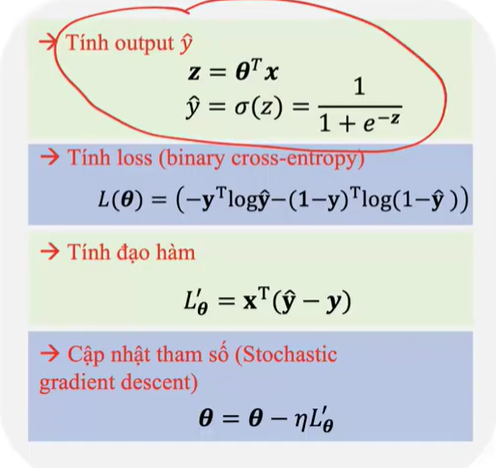

In [37]:
import numpy as np
import torch
import torch.nn as nn

In [38]:
iris = np.genfromtxt('iris_2D_3c.csv',dtype=None, delimiter=',', skip_header=1)
X = torch.tensor(iris[:, 0:2], dtype=torch.float32)
y = torch.tensor(iris[:, 2], dtype=torch.int64)

In [39]:
# input_dim: feature
input_dim = X.shape[1]

# output_dim: class output
output_dim = len(torch.unique(y))


print(input_dim)
print(output_dim)
#define model
model = nn.Linear(in_features=input_dim, out_features=output_dim)

#loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)

2
3


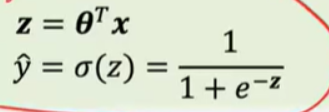

In [40]:
#training loop
epoch_max = 5000
losses = []
for epoch in range(epoch_max):
    # z= wx+b
    z = model(X)    
    #compute loss (criterion -> z -> y_hat) z: is call logits
    loss = criterion(z, y)
    losses.append(loss.item())

    #Backward and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

visualization

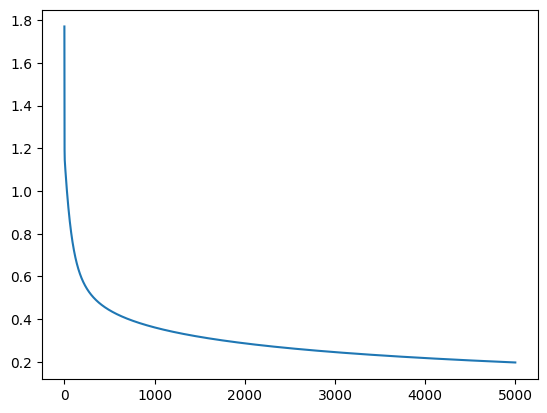

In [41]:
import matplotlib.pyplot as plt
plt.plot(losses)

accuracy

In [47]:
with torch.no_grad():
    z = model(X)
    predict = torch.argmax(z, dim=1)
    accuracy = (predict == y).sum().item() / y.size(0)
    print(f'Accuracy: {accuracy * 100}%')

Accuracy: 100.0%
